<a href="https://colab.research.google.com/github/makataomu/DLS_base/blob/main/savy1_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we need to predict the chance of admit

In [ ]:
import pandas as pd

In [ ]:
ap = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/savy/Admission_Predict.csv')
print(ap.head())
print(ap.shape)
ap11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/savy/Admission_Predict_Ver1.1.csv', sep=',')
print(ap11.head())
print(ap11.shape)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
(400, 9)
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322    

In [ ]:
#let's check all values
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
num_cols = [
    'GRE Score',
    'TOEFL Score',
    'University Rating',
    'SOP',
    'LOR',
    'CGPA',
    'Research'
]

target_col = 'Chance of Admit'

ap.columns = ap.columns.to_series().apply(lambda x: x.strip())

cols = num_cols + [target_col]
ap = ap[cols]

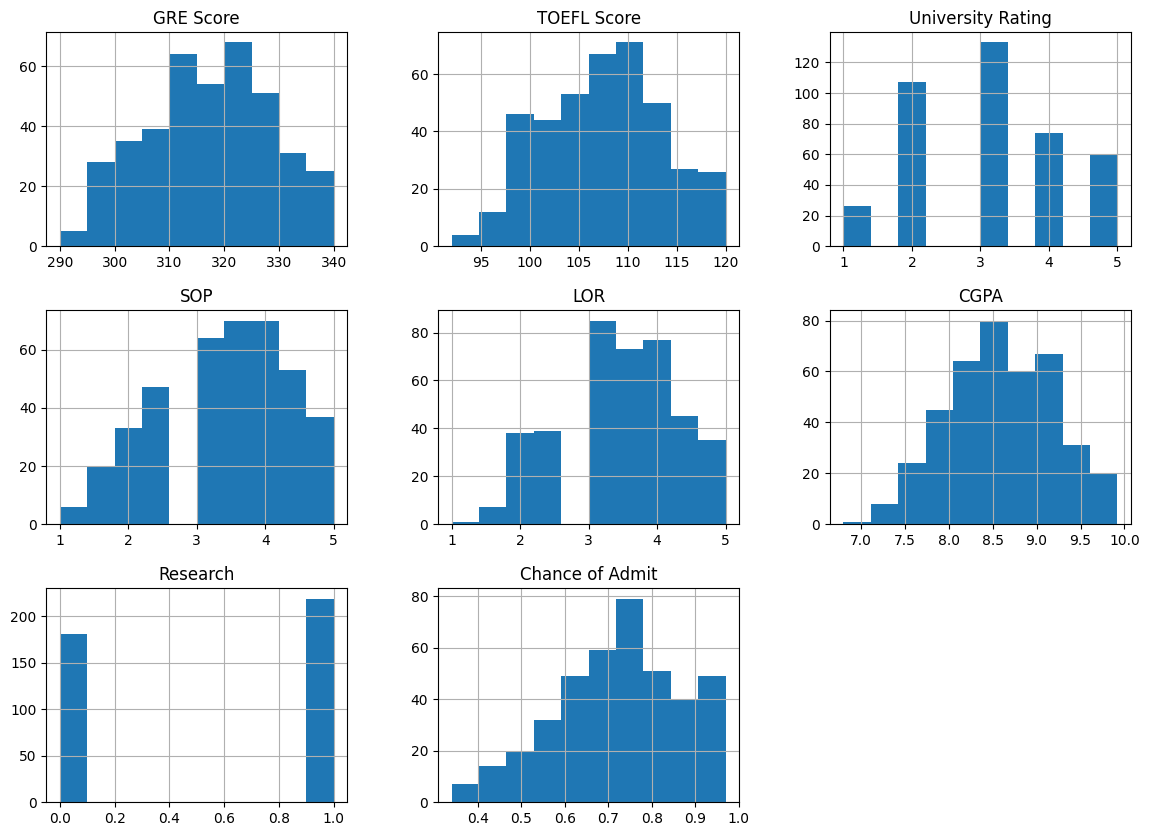

In [ ]:
#fancy stuff
ap.hist(figsize=(14, 10))
None

In [ ]:
ap.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
ap.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-108-36fd9634fbbf>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  ap.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.00,0.84,0.67,0.61,0.56,0.83,0.58,0.80
TOEFL Score,0.84,1.00,0.70,0.66,0.57,0.83,0.49,0.79
University Rating,0.67,0.70,1.00,0.73,0.66,0.75,0.45,0.71
SOP,0.61,0.66,0.73,1.00,0.73,0.72,0.44,0.68
LOR,0.56,0.57,0.66,0.73,1.00,0.67,0.40,0.67
CGPA,0.83,0.83,0.75,0.72,0.67,1.00,0.52,0.87
Research,0.58,0.49,0.45,0.44,0.40,0.52,1.00,0.55
Chance of Admit,0.80,0.79,0.71,0.68,0.67,0.87,0.55,1.00


In [ ]:
#pd.plotting.scatter_matrix(ap, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)
None

In [ ]:
X = ap.drop('Chance of Admit', axis=1)
y = ap['Chance of Admit']

In [ ]:
X = (X - X.mean())/X.std()
ones = pd.DataFrame(np.ones((X.shape[0],1)), columns=["w0"])
#X = pd.concat([X, ones], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets as 70:15:15
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train)

# Transform the training, validation, and testing sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

When preparing your data for machine learning, it is important to split your data into training and test sets before doing any scaling or transformation. You should apply any scaling or transformation on the training set only, and then apply the same transformation to the test set using the parameters learned from the training set. This approach ensures that your model is evaluated on unseen data and avoids any data leakage issues.

Here I'm also using validation set

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assume X_train, X_val, y_train, y_val are your training and validation sets

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_pred = lr.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Linear Regression")
print("MSE val: ", mse)
print("R2 val score: ", r2)

# Evaluate on test set
y_pred_test = lr.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print()
print("MSE test : ", mse_test)
print("R2 test score: ", r2_test)

Linear Regression
MSE val:  0.00439007100150178
R2 val score:  0.8044037454591015

MSE test :  0.004915572691460812
R2 test score:  0.7751853331140721


If the points are closely clustered around the diagonal line, it indicates good performance of the model.

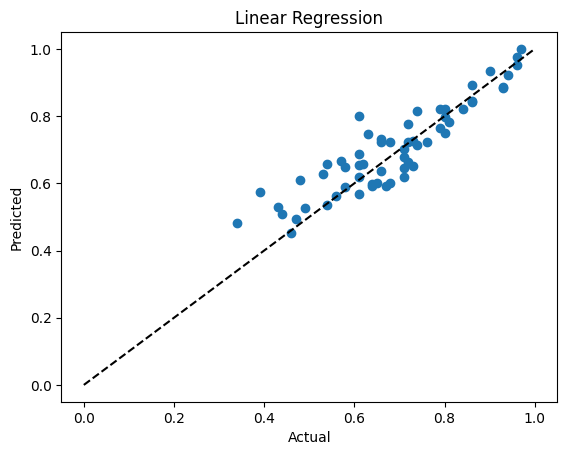

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted for linear regression
plt.scatter(y_val, y_pred)
plt.plot([0, 1], [0, 1], '--k')  # diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

Text(0, 0.5, 'R2')

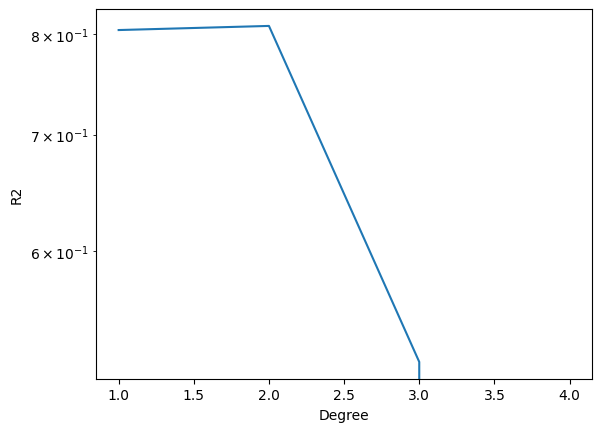

In [ ]:
max_r2, best_deg = 0, 0

r2s = []

degrees = np.arange(1,5)

for deg in degrees:
  #poly features
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_train_poly = poly_features.fit_transform(X_train_scaled)

  #linear Regression
  lr_poly = LinearRegression()
  lr_poly.fit(X_train_poly, y_train)  

  #test
  X_val_poly = poly_features.transform(X_val_scaled)
  y_pred_poly = lr_poly.predict(X_val_poly)

  #mse_poly = mean_squared_error(y_val, y_pred_poly)
  r2_poly = r2_score(y_val, y_pred_poly)
  r2s.append(r2_poly)

  if r2_poly > max_r2:
    max_r2 = r2_poly
    best_deg = deg

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, r2s)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('R2')



In [ ]:
# Polynomial Regression
degree = best_deg  # degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Evaluate on validation set
X_val_poly = poly.transform(X_val_scaled)
y_pred_poly = lr_poly.predict(X_val_poly)
mse_poly = mean_squared_error(y_val, y_pred_poly)
r2_poly = r2_score(y_val, y_pred_poly)

print("Polynomial Regression (degree = {})".format(degree))
print("MSE: ", mse_poly)
print("R2 score: ", r2_poly)

# Evaluate on test set
X_test_poly = poly.transform(X_test_scaled)
y_pred_test_poly = lr_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_test_poly)
r2_poly = r2_score(y_test, y_pred_test_poly)

print()
print("MSE test : ", mse_poly)
print("R2 test score: ", r2_poly)

Polynomial Regression (degree = 2)
MSE:  0.004290886879410488
R2 score:  0.8088228181311261

MSE test :  0.004961155900078977
R2 test score:  0.7731005762598226


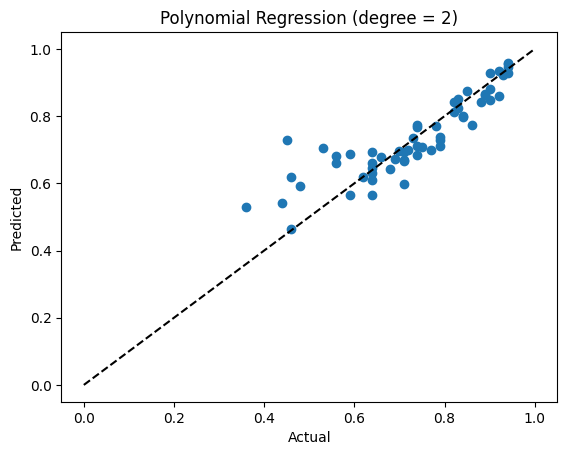

In [ ]:
# Plot actual vs predicted for polynomial regression
plt.scatter(y_test, y_pred_test_poly)
plt.plot([0, 1], [0, 1], '--k')  # diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression (degree = {})'.format(degree))
plt.show()

# Now let's implement other models but before that we should check for multicolinearity

In [ ]:
import pandas as pd

corr_matrix = X.corr()

# Display the correlation matrix
print(corr_matrix)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   

                        LOR      CGPA  Research  
GRE Score          0.557555  0.833060  0.580391  
TOEFL Score        0.567721  0.828417  0.489858  
University Rating  0.660123  0.746479  0.447783  
SOP                0.729593  0.718144  0.444029  
LOR                1.000000  0.670211  0.396859  
CGPA               0.670211  1.000000  0.521654  
Research           0.396859  0.521654  1.000000  


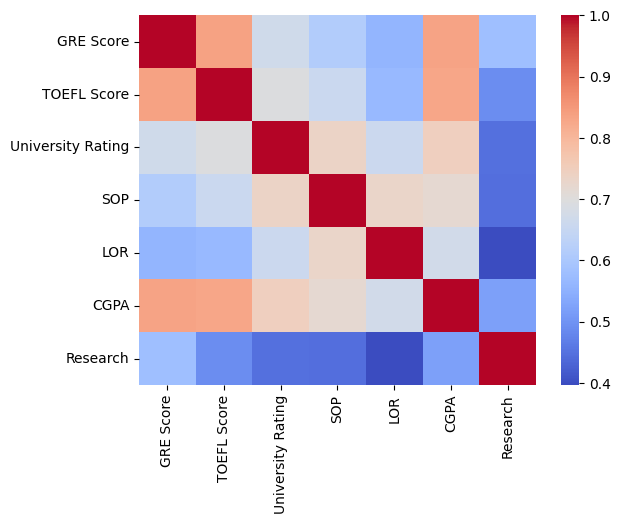

In [ ]:
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')
None

In [ ]:
#remove that

In [ ]:
from sklearn.linear_model import LassoCV

alphas = [0.001, 0.01, 0.1, 1]

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train_scaled, y_train)

print("Best alpha:", lasso_cv.alpha_)
print("R^2 score with best alpha:", lasso_cv.score(X_train_scaled, y_train))

# Evaluate the model on the validation set
val_score = lasso_cv.score(X_val_scaled, y_val)
print("Validation R^2 score:", val_score)

# Evaluate the model on the test set
test_score = lasso_cv.score(X_test_scaled, y_test)
print("Test R^2 score:", test_score)

Best alpha: 0.001
R^2 score with best alpha: 0.8018983880974342
Validation R^2 score: 0.8025343635846552
Test R^2 score: 0.7735909116351233


In [ ]:
from sklearn.linear_model import RidgeCV

# Assume X_train and y_train are your training data
# Define the range of alpha values to try
alphas = [1, 10, 20, 30]

# Create a RidgeCV object with the range of alpha values and set cv=5 for 5-fold cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Fit the RidgeCV object to the training data
ridge_cv.fit(X_train_scaled, y_train)

# Print the best alpha value and corresponding R^2 score
print("Best alpha:", ridge_cv.alpha_)
print("R^2 score with best alpha:", ridge_cv.score(X_train_scaled, y_train))

# Evaluate the model on the validation set
val_score = ridge_cv.score(X_val_scaled, y_val)
print("Validation R^2 score:", val_score)

# Evaluate the model on the test set
test_score = ridge_cv.score(X_test_scaled, y_test)
print("Test R^2 score:", test_score)

Best alpha: 20
R^2 score with best alpha: 0.7997682537474963
Validation R^2 score: 0.8017673150451672
Test R^2 score: 0.7706951492863229


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Set up the Elastic Net model
elastic_net = ElasticNet()

# Set up the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best alpha and l1_ratio values
print("Best alpha value:", grid_search.best_params_['alpha'])
print("Best l1_ratio value:", grid_search.best_params_['l1_ratio'])

# Print R^2 score with best hyperparameters
elastic_net_best = ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'])
elastic_net_best.fit(X_train_scaled, y_train)
print("R^2 score with best hyperparameters:", elastic_net_best.score(X_train_scaled, y_train))

# Evaluate the model on the validation set
val_score = elastic_net_best.score(X_val_scaled, y_val)
print("Validation R^2 score:", val_score)

# Evaluate the model on the test set
test_score = elastic_net_best.score(X_test_scaled, y_test)
print("Test R^2 score:", test_score)


Best alpha value: 0.01
Best l1_ratio value: 0.3
R^2 score with best hyperparameters: 0.8011846414643453
Validation R^2 score: 0.7981842399741452
Test R^2 score: 0.7697760111849525


More complex models show worse results. It may indicate that the relationship between the input features and output variable is relatively simple and can be modeled effectively by these simpler models.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5, 6]}

# Create a DecisionTreeRegressor object
dt = DecisionTreeRegressor()

# Create a GridSearchCV object with the parameter grid to search and 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and R^2 score
print("Best hyperparameters:", grid_search.best_params_)
print("Training R^2 score:", grid_search.best_score_)
print("Validation R^2 score:", grid_search.score(X_val_scaled, y_val))
print("Test R^2 score:", grid_search.score(X_test_scaled, y_test))

Best hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Training R^2 score: 0.675855437300249
Validation R^2 score: 0.6962357249902773
Test R^2 score: 0.7690375977273619


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_estimators': [30, 50, 100],
              'max_depth': [2, 3, 4, 5],
              'min_samples_split': [3, 4, 5, 6]}

# Create a RandomForestRegressor object
rf = RandomForestRegressor()

# Create a GridSearchCV object with the parameter grid to search and 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and R^2 score
print("Best hyperparameters:", grid_search.best_params_)
print("Training R^2 score:", grid_search.best_score_)
print("Validation R^2 score:", grid_search.score(X_val_scaled, y_val))
print("Test R^2 score:", grid_search.score(X_test_scaled, y_test))

Best hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
Training R^2 score: 0.7395195432087691
Validation R^2 score: 0.7561898004397727
Test R^2 score: 0.7811379323445257


I just wanted to see how Gradient Boosting will work here

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Create an instance of the XGBRegressor class
xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0]}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the XGBoost model with the best hyperparameters
xgb_best = XGBRegressor(**grid_search.best_params_)
xgb_best.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
val_pred = xgb_best.predict(X_val_scaled)
val_score = r2_score(y_val, val_pred)
print("Validation R^2 score:", val_score)

# Evaluate the model on the test set
test_pred = xgb_best.predict(X_test_scaled)
test_score = r2_score(y_test, test_pred)
print("Test R^2 score:", test_score)


Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Validation R^2 score: 0.7674707619448469
Test R^2 score: 0.7785060170559497
